### 선형회귀 
KNN 회귀 문제점
- 훈련데이터 셋이 45cm까지 밖에 없음
- 거리 기반 알고리즘이기때문에 45cm 이상(즉 훈련데이터 그 이상의 데이터)는 모두 동일 예측

그래서 탄생한게 선형회귀다~! <br>
- $y = ax + b$
- $f(x) = ax + b$
- 독립변수$x$가 1개 이상으로 종속변수$y$를 예측<br>
<b>궁극적으로는 최적의 직선의 방정식(최적의 선)을 어떻게 그럴지</b>


In [128]:
# 데이터
# 데이터 준비
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
    21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
    23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
    27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
    39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
    44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
    115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
    150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
    218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
    556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
    850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
    1000.0])

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
  perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)


# 선형회귀 모델 생성 및 평가
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

# 50cm 농어 무게 예측
lr.predict([[50]])

# y = ax + b 식의 a(계수)과 b(절편) 찾기
f'계수{lr.coef_} , 절편{lr.intercept_}'

'계수[39.01714496] , 절편-709.0186449535477'

(0.939846333997604, 0.8247503123313558)

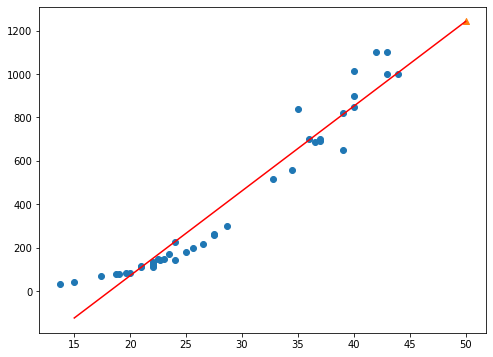

In [129]:
# 그래프 표현
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(train_input, train_target)
# plt.plot(train_input, lr.predict(train_input), color='r')
# plt.plot(train_input, lr.coef_ * train_input + lr.intercept_, color='r')

# print(lr.predict(train_input))
# print(train_input)

# 15부터 50까지 예측선 그리기
plt.plot([15,50], [15*lr.coef_+lr.intercept_ , 50*lr.coef_+lr.intercept_ ], color = "r")
# plt.sho()

# 50cm 농어 데이터
plt.scatter(50, lr.predict([[50]]), marker='^')

# 모델 평가 - 결정계수
lr.score(train_input, train_target), lr.score(test_input, test_target)

# 그래프에서 절편이 -으로 길이가 작으면서 무게가 음수 2차 함수로 전체적으로 언더피팅
# 훈련데이터는 오버피팅

### 다항 회귀
- 2차 방정식으로 만들기!
- $y = ax^2 + bx + c$ 이런 식으로 다항으로 만들기

[-21.55792498   1.01433211] 116.05021078278372
0.9706807451768623 0.9775935108325123


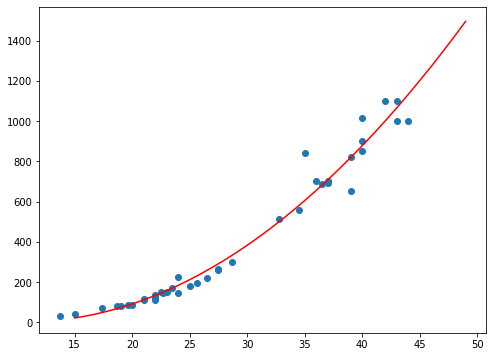

In [151]:
# 넘파이로 input 데이터(x값) 다항으로 변환
# poly 사용
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
train_poly 

# 사이킷런으로 변환
from sklearn.preprocessing import PolynomialFeatures
#함수를 만들어줌
poly = PolynomialFeatures(degree = 2, include_bias=False) 
train_poly = poly.fit_transform(train_input)
test_poly = poly.fit_transform(test_input)
train_poly

lr = LinearRegression()
lr.fit(train_poly, train_target)

lr.predict([[50, 50**2]])

print(lr.coef_ , lr.intercept_)

# 곡선 그래프 출력

plt.figure(figsize=(8,6))
plt.scatter(train_input, train_target)

# 곡선 예측선
# plt.plot(train_input, lr.coef_[1]*train_input**2 + lr.coef_[0]*train_input + lr.intercept_)
# plt.plot(train_input, lr.predict(train_poly))

# print(lr.predict(train_poly))
# print(train_input)

# 15부터 50 그리기
point = np.arange(15,50)
plt.plot(point, lr.coef_[1]*point**2 + lr.coef_[0]*point+ lr.intercept_, color ="r")

# 농더 50cm 데이터
# plt.scatter(50, lr.predict([[50, 50**2]]))

# 평가
print(lr.score(train_poly, train_target), lr.score(test_poly, test_target))

# 시발 왜 대체 왜 시발 왜 대체 왜 ㅈ같이 나오는겨

[-4.24063527e+02  1.44681683e+01 -1.45801242e-01] 4092.634555350798
0.9480765883890919 0.7108986733548148


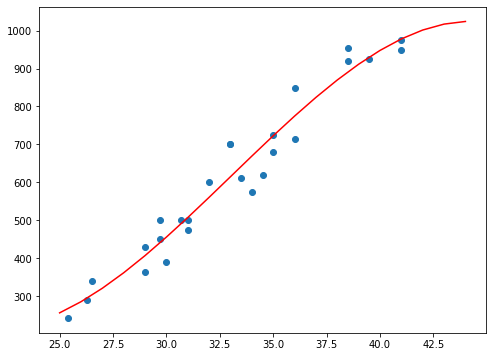

In [165]:
# 도미 무게에서 3차항으로 만들어 예측
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

train_input, test_input, train_target, test_target = train_test_split(
  bream_length, bream_weight, random_state=42)


train_input = np.array(train_input).reshape(-1,1)
test_input = np.array(test_input).reshape(-1,1)

#  3차항으로 변환
poly = PolynomialFeatures(degree = 3, include_bias=False) 
train_poly = poly.fit_transform(train_input)
test_poly = poly.fit_transform(test_input)
train_poly

lr = LinearRegression()
lr.fit(train_poly, train_target)

lr.predict([[50, 50**2, 50**3]])

print(lr.coef_ , lr.intercept_)
# print(train_poly)

# 곡선 그래프 출력

plt.figure(figsize=(8,6))
plt.scatter(train_input, train_target)

# 곡선 예측선
# plt.plot(train_input, lr.coef_[1]*train_input**2 + lr.coef_[0]*train_input + lr.intercept_)
# plt.plot(train_input, lr.predict(train_poly))

# print(lr.predict(train_poly))
# print(train_input)

# 15부터 50 그리기
point = np.arange(25,45)
plt.plot(point, lr.coef_[2]*point**3 + lr.coef_[1]*point**2 + lr.coef_[0]*point + lr.intercept_, color ="r")

# 농더 50cm 데이터
# plt.scatter(50, lr.predict([[50, 50**2]]))

# 평가
print(lr.score(train_poly, train_target), lr.score(test_poly, test_target))